Będziemy rozważać równanie 
$$ dX_t = (\alpha - X_t - \lambda X_t (1-X_t) + \frac{1}{2} \sigma X_t (1-X_t) (1-2X_t)) dt + \sigma X_t (1-X_t)  $$
Do dalszych obliczeń przy schemacie Milsteina przyda się pochodna współczynnika dyfuzji po zmiennej x
$$ b_x' (x) = \sigma (1-2x) $$

In [1]:
#importowanie bibliotek
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets

In [2]:
def a(al, l, s, x): #współczynnik dryfu
    return np.array(al-x+l*x*(1-x)+s*s*x*(1-x)*(1-2*x)/2 )
def b(s,x): #współczynnik dyfuzji
    return np.array(s*x*(1-x))
def bp(s,x): #pochodna b
    return np.array(s*(1-2*x))
    

In [3]:
def euler (al, l, s, x_0, T, n,N): #parametry alfa, lambda, sigma, x[0], długość przedziału, gęstość siatki, tablica zmiennych normalnych
    t=np.linspace(0,T,n+1)
    x=np.zeros(n+1)
    x[0]=x_0
    j=int((N.size)/n)
    for i in range(n):
        x[i+1]=x[i]+T/n*a(al,l,s,x[i])+np.sqrt(T/n)*N[i*j]*b(s,x[i])
    return np.array([t,x])
    
def milstein(al, l, s, x_0, T, n,N): #parametry, alfa, lambda, sigma, x[0], długość przedziału, gęstość siatki, tablica zmiennych normalnych
    t=np.linspace(0,T,n+1)
    x=np.zeros(n+1)
    x[0]=x_0
    j=int((N.size)/n)
    for i in range(n):
        x[i+1]=x[i]+T/n*a(al,l,s,x[i])+np.sqrt(T/n)*N[i*j]*b(s,x[i])+bp(s,x[i])*b(s,x[i])*((T/n)*N[(i*j)]*N[(i*j)]-T/n)/2
    return np.array([t,x])
def konwersja (N,n): #dzielenie tablicy rozkladu normalnego na mniejsza przy zachowywaniu przyrostow (wariancji) dziele na n czesci
    m=int((N.size)/n)
    M=np.zeros(m)
    for i in range(m):
        M[i]=N[(i*n):(i*n+n)].sum()/np.sqrt(n)
    return M

    

Przykładowe rysunki


Metoda Eulera przy 10 krokach oraz metoda Milsteina przy 10000 krokach

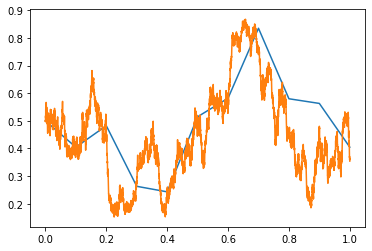

In [4]:
N=np.random.randn(10000)
e=euler(0.2,0.7,3,0.5,1,10,konwersja(N,1000))
m=milstein(0.2,0.7,3,0.5,1,10000,N)
plt.plot(e[0],e[1])
plt.plot(m[0],m[1])



Metoda Eulera przy 20 krokach oraz metoda Milsteina przy 10000 krokach

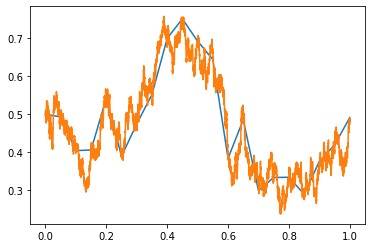

In [5]:
N=np.random.randn(10000)
e=euler(0.6,0.2,2,0.5,1,20,konwersja(N,500))
m=milstein(0.6,0.2,2,0.5,1,10000,N)
plt.plot(e[0],e[1])
plt.plot(m[0],m[1])


Metoda Milsteina przy 10 krokach oraz metoda Milsteina przy 10000 krokach

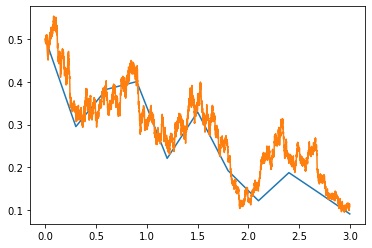

In [6]:
N=np.random.randn(10000)
e=milstein(0.01,0.9,1,0.5,3,10,konwersja(N,1000))
m=milstein(0.01,0.9,1,0.5,3,10000,N)
plt.plot(e[0],e[1])
plt.plot(m[0],m[1])


Pierwszy test. Silny rząd schematu Eulera. Za rozwiązanie dokładne przyjmuje rozwiązanie przybliżone Schematem Milsteina z najgęstszą siatką.
Szacować błąd będę formułą 
$$ E(|X_T-Y_T|) $$ gdzie $X_t$ to przybliżone rozwiązanie w chwili ostatniej, a $Y_T$ to rozwiązanie dokładne w chwili ostatniej. Błąd przy N próbach będzie mieć postać 
$$ \frac{1}{N} \sum_{i=1}^{N} |X^i_T-Y^i_T|$$
Oszacowanie błędu będzie polegało na policzeniu błędów przy odpowiednio gęstych siatkach oraz kolejno ze zdwojonym krokiem i zwiększonym dziesięciokrotnie. Następnie odpowiednie błędy dzielimy przez siebie i bierzemy logarytm o podstawie odpowiednio 2 i 10 co powinno dać oszacowanie rzędu

In [7]:
def euler_blad (al, l, s, x_0, T, n_1,n_2, proby): ## n_2 do milsteina n_1 do eulera n_2>n_1
    er_1=0
    for i in range(proby):
        N=np.random.randn(n_2)
        e=euler(al, l, s, x_0, T,n_1,konwersja(N,int(n_2/n_1)))
        m=milstein(al, l, s, x_0, T,n_2,N)
        er_1+=np.abs(e[1][-1]-m[1][-1])
    return er_1/proby
    

In [8]:
print("Szacowanie rzędu przy podwajanych krokach")
print(np.log2(euler_blad(0.2,0.6,2.7,0.5,1,250,20000,80)/euler_blad(0.2,0.6,2.7,0.5,1,500,20000,80)))
print(np.log2(euler_blad(0.2,0.6,2.7,0.5,1,500,20000,80)/euler_blad(0.2,0.6,2.7,0.5,1,1000,20000,80)))
print(np.log2(euler_blad(0.2,0.6,2.7,0.5,1,1000,20000,80)/euler_blad(0.2,0.6,2.7,0.5,1,2000,20000,80)))
print(np.log2(euler_blad(0.2,0.6,2.7,0.5,1,2500,20000,80)/euler_blad(0.2,0.6,2.7,0.5,1,5000,20000,80)))
print(np.log2(euler_blad(0.2,0.6,2.7,0.5,1,5000,20000,80)/euler_blad(0.2,0.6,2.7,0.5,1,10000,20000,80)))

Szacowanie rzędu przy podwajanych krokach
0.579216800804063
0.3025394820078431
0.1934068199646761
0.8407793647226828
0.538504069215662


In [9]:
print("Szacowanie rzędu przy krokach zwiększanych dziesięciokrotnie")
print(np.log10(euler_blad(0.2,0.6,2.7,0.5,1,20,20000,80)/euler_blad(0.2,0.6,2.7,0.5,1,200,20000,80)))
print(np.log10(euler_blad(0.2,0.6,2.7,0.5,1,200,20000,80)/euler_blad(0.2,0.6,2.7,0.5,1,2000,20000,80)))
print(np.log10(euler_blad(0.2,0.6,2.7,0.5,1,2000,20000,80)/euler_blad(0.2,0.6,2.7,0.5,1,20000,20000,80)))

Szacowanie rzędu przy krokach zwiększanych dziesięciokrotnie
0.607484180474336
0.3992469088768698
0.4312667190586246


In [10]:
def milstein_blad (al, l, s, x_0, T, n_1,n_2, proby): ## n_2 do milsteina n_1 do eulera n_2>n_1
    er_1=0
    for i in range(proby):
        N=np.random.randn(n_2)
        e=milstein(al, l, s, x_0, T,n_1,konwersja(N,int(n_2/n_1)))
        m=milstein(al, l, s, x_0, T,n_2,N)
        er_1+=np.abs(e[1][-1]-m[1][-1])
    return er_1/proby


Wykonujemy podobne szacowania dla schematu Milsteina tą samą zasadą

In [11]:
print("Szacowanie rzędu przy podwajanych krokach")
print(np.log2(milstein_blad(0.2,0.6,2.7,0.5,1,250,20000,80)/milstein_blad(0.2,0.6,2.7,0.5,1,500,20000,80)))
print(np.log2(milstein_blad(0.2,0.6,2.7,0.5,1,500,20000,80)/milstein_blad(0.2,0.6,2.7,0.5,1,1000,20000,80)))
print(np.log2(milstein_blad(0.2,0.6,2.7,0.5,1,1000,20000,80)/milstein_blad(0.2,0.6,2.7,0.5,1,2000,20000,80)))
print(np.log2(milstein_blad(0.2,0.6,2.7,0.5,1,2500,20000,80)/milstein_blad(0.2,0.6,2.7,0.5,1,5000,20000,80)))

Szacowanie rzędu przy podwajanych krokach
1.1293402215111885
1.1346889154042954
1.1702282617602744
1.131822435569936


In [12]:
print("Szacowanie rzędu przy krokach zwiększanych dziesięciokrotnie")
print(np.log10(milstein_blad(0.2,0.6,2.7,0.5,1,20,20000,80)/milstein_blad(0.2,0.6,2.7,0.5,1,200,20000,80)))
print(np.log10(milstein_blad(0.2,0.6,2.7,0.5,1,200,20000,80)/milstein_blad(0.2,0.6,2.7,0.5,1,2000,20000,80)))

Szacowanie rzędu przy krokach zwiększanych dziesięciokrotnie
1.0255632807042143
0.9655393544461192


Powinniśmy uzyskiwać teoretycznie rząd 0,5 dla schematu Eulera oraz 1 dla schematu Milsteina. Eksperymenty numeryczne dość dobrze oddają ten wynik. Dla kroku zwiększanego dziesięciokrotnie lepiej

Na koniec interaktywny generator wykresów

In [13]:
def przycisk(al, lm, si, x0, T, LW, n, me):
    if me=="E-M":
        for k in range(LW):
            N=np.random.randn(n)
            e=euler(al,lm,si,x0,T,n,N)
            plt.plot(e[0],e[1])
    else:
        for k in range(LW):
            N=np.random.randn(n)
            m=milstein(al,lm,si,x0,T,n,N)
            plt.plot(m[0],m[1])
def przycisk2(x):
    if x!=None:
        przycisk(alpha.value,lmbda.value, sigma.value, x_0.value, CzasKoncowy.value,LiczbaWykresow.value,LiczbaKrokow.value,b1.value)


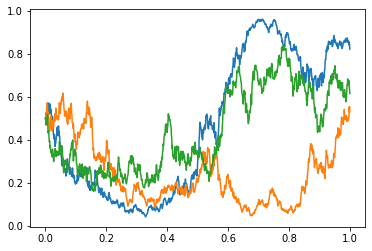

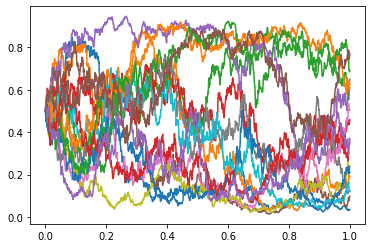

In [15]:

alpha = widgets.FloatSlider(value=0.2, min=0.0, max=1.0,
    step=0.2, description='alpha:', continuous_update=False)
lmbda = widgets.FloatSlider(value=0.6, min=0.0, max=1.0,
    step=0.2, description='lambda:', continuous_update=False)
sigma = widgets.FloatSlider(value=2.7, min=0.0, max=5,
    step=0.2, description='sigma:', continuous_update=False)
CzasKoncowy = widgets.FloatSlider(value=1.0, min=0.0, max=5.0,
    step=0.2, description='T:', continuous_update=False)
x_0 = widgets.FloatSlider(value=0.5, min=0.0, max=1.0,
    step=0.2, description='x_0:', continuous_update=False)
LiczbaKrokow = widgets.IntSlider(value=1000, min=0.0, max=20000,
     description='Kroki:', continuous_update=False)
LiczbaWykresow = widgets.IntSlider(value=3, min=0.0, max=20,
     description='Wykresy:', continuous_update=False)


c1 = widgets.HBox(children=[alpha, lmbda ])
c2 = widgets.HBox(children=[x_0, CzasKoncowy ])
c3 = widgets.HBox(children=[sigma,LiczbaKrokow])
c4=widgets.HBox(children=[LiczbaWykresow])
b1=widgets.RadioButtons(
    options=['E-M',"Milstein"],
    description='metoda:',
    disabled=False
)


b2 = widgets.Button(
    description='Pokaż wykres',
    disabled=False,
    button_style='', 
 
)

b2.on_click(przycisk2)

widgets.VBox([c1, c2, c3,c4,b1,b2])


